In [22]:
import pandas as pd
import collections
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.tree import export_graphviz
from sklearn.metrics import precision_recall_fscore_support

In [23]:
df = pd.read_csv('eval.csv',sep=';')

In [24]:
df.head()

,MP URI,HP URI,jaccardSimilarityLabels,jaccardSimilarityDefinitions,jaccardSimilaritySynonyms,sigmoidSimilarityLabels,sigmoidSimilarityDefinitions,sigmoidSimilaritySynonyms,cosineSimilarityLabels,cosineSimilarityDefinitions,cosineSimilaritySynonyms,jaccardSubtree,cosineSubtree,descendantsEvaluation,hasLoop,silverMapping,ourScore
0,http://purl.obolibrary.org/obo/HP_0008516,http://purl.obolibrary.org/obo/MP_0004601,0.857143,0.000000,0.700000,0.250000,0.000000,0.142857,0.365148,0.000000,0.235702,0.000000,0.333333,0,0,4,4
1,http://purl.obolibrary.org/obo/HP_0001681,http://purl.obolibrary.org/obo/MP_0006112,0.307692,0.692308,0.923077,0.096403,0.111111,0.499994,0.707107,0.223607,1.000000,1.000000,1.000000,0,0,4,3
2,http://purl.obolibrary.org/obo/HP_0008054,http://purl.obolibrary.org/obo/MP_0006192,0.909091,0.833333,0.000000,0.333333,0.200000,0.000000,0.816497,0.716115,0.000000,0.333333,0.730297,0,0,2,4
3,http://purl.obolibrary.org/obo/HP_0001101,http://purl.obolibrary.org/obo/MP_0006229,0.333333,0.590909,0.000000,0.107114,0.100000,0.000000,0.000000,0.301511,0.000000,1.000000,1.000000,0,0,2,3
4,http://purl.obolibrary.org/obo/HP_0002251,http://purl.obolibrary.org/obo/MP_0002731,0.727273,0.481481,0.666667,0.249832,0.066666,0.199866,0.707107,0.306786,0.000000,0.000000,0.679366,0,0,4,3


In [25]:
df = df.drop(['MP URI', 'HP URI', 'ourScore'], axis=1)

In [26]:
df.head()

,jaccardSimilarityLabels,jaccardSimilarityDefinitions,jaccardSimilaritySynonyms,sigmoidSimilarityLabels,sigmoidSimilarityDefinitions,sigmoidSimilaritySynonyms,cosineSimilarityLabels,cosineSimilarityDefinitions,cosineSimilaritySynonyms,jaccardSubtree,cosineSubtree,descendantsEvaluation,hasLoop,silverMapping
0,0.857143,0.000000,0.700000,0.250000,0.000000,0.142857,0.365148,0.000000,0.235702,0.000000,0.333333,0,0,4
1,0.307692,0.692308,0.923077,0.096403,0.111111,0.499994,0.707107,0.223607,1.000000,1.000000,1.000000,0,0,4
2,0.909091,0.833333,0.000000,0.333333,0.200000,0.000000,0.816497,0.716115,0.000000,0.333333,0.730297,0,0,2
3,0.333333,0.590909,0.000000,0.107114,0.100000,0.000000,0.000000,0.301511,0.000000,1.000000,1.000000,0,0,2
4,0.727273,0.481481,0.666667,0.249832,0.066666,0.199866,0.707107,0.306786,0.000000,0.000000,0.679366,0,0,4


In [27]:
df = df[df['silverMapping'] != 0.0]

In [28]:
df.head()

,jaccardSimilarityLabels,jaccardSimilarityDefinitions,jaccardSimilaritySynonyms,sigmoidSimilarityLabels,sigmoidSimilarityDefinitions,sigmoidSimilaritySynonyms,cosineSimilarityLabels,cosineSimilarityDefinitions,cosineSimilaritySynonyms,jaccardSubtree,cosineSubtree,descendantsEvaluation,hasLoop,silverMapping
0,0.857143,0.000000,0.700000,0.250000,0.000000,0.142857,0.365148,0.000000,0.235702,0.000000,0.333333,0,0,4
1,0.307692,0.692308,0.923077,0.096403,0.111111,0.499994,0.707107,0.223607,1.000000,1.000000,1.000000,0,0,4
2,0.909091,0.833333,0.000000,0.333333,0.200000,0.000000,0.816497,0.716115,0.000000,0.333333,0.730297,0,0,2
3,0.333333,0.590909,0.000000,0.107114,0.100000,0.000000,0.000000,0.301511,0.000000,1.000000,1.000000,0,0,2
4,0.727273,0.481481,0.666667,0.249832,0.066666,0.199866,0.707107,0.306786,0.000000,0.000000,0.679366,0,0,4


In [29]:
df["silverMapping"].value_counts()

4    1351
2     406
3     248
Name: silverMapping, dtype: int64

In [30]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2004
Data columns (total 14 columns):
jaccardSimilarityLabels         2005 non-null float64
jaccardSimilarityDefinitions    2005 non-null float64
jaccardSimilaritySynonyms       2005 non-null float64
sigmoidSimilarityLabels         2005 non-null float64
sigmoidSimilarityDefinitions    2005 non-null float64
sigmoidSimilaritySynonyms       2005 non-null float64
cosineSimilarityLabels          2005 non-null float64
cosineSimilarityDefinitions     2005 non-null float64
cosineSimilaritySynonyms        2005 non-null float64
jaccardSubtree                  2005 non-null float64
cosineSubtree                   2005 non-null float64
descendantsEvaluation           2005 non-null int64
hasLoop                         2005 non-null int64
silverMapping                   2005 non-null int64
dtypes: float64(11), int64(3)
memory usage: 235.0 KB


,jaccardSimilarityLabels,jaccardSimilarityDefinitions,jaccardSimilaritySynonyms,sigmoidSimilarityLabels,sigmoidSimilarityDefinitions,sigmoidSimilaritySynonyms,cosineSimilarityLabels,cosineSimilarityDefinitions,cosineSimilaritySynonyms,jaccardSubtree,cosineSubtree,descendantsEvaluation,hasLoop,silverMapping
0,0.857143,0.000000,0.700000,0.250000,0.000000,0.142857,0.365148,0.000000,0.235702,0.000000,0.333333,0,0,4
1,0.307692,0.692308,0.923077,0.096403,0.111111,0.499994,0.707107,0.223607,1.000000,1.000000,1.000000,0,0,4
2,0.909091,0.833333,0.000000,0.333333,0.200000,0.000000,0.816497,0.716115,0.000000,0.333333,0.730297,0,0,2
3,0.333333,0.590909,0.000000,0.107114,0.100000,0.000000,0.000000,0.301511,0.000000,1.000000,1.000000,0,0,2
4,0.727273,0.481481,0.666667,0.249832,0.066666,0.199866,0.707107,0.306786,0.000000,0.000000,0.679366,0,0,4


In [31]:
colNames = df.columns.values.tolist()
colNames.remove('silverMapping')
    
#Features    
features = df[colNames].values

#Labels
labels = df['silverMapping'].values   

In [32]:
# Create train and test sets 
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.40, random_state=12345)

In [33]:
# Create logistic regression estimator 
lrCV = LogisticRegressionCV(cv=5, multi_class='multinomial', max_iter=10000)

# Create radom forest estomator
rfCV = RandomForestClassifier(n_estimators=100000, max_depth=20, criterion='gini', max_features='auto', random_state=42)

In [34]:
# Train logistic regression 
lrCVModel = lrCV.fit(train_x, train_y)

# Train random forest 
rfCVModel = rfCV.fit(train_x, train_y)

In [35]:
# Evaluate logistic regression model 
y_pred_LR = lrCVModel.predict(test_x)

# Random Forest
y_pred_RF = rfCVModel.predict(test_x)

In [36]:
# Logistic regression
precisionLR, recallLR, f1LR,_ = precision_recall_fscore_support(test_y, y_pred_LR, average='weighted')

# Evaluate Random Forest model 
precisionRF, recallRF, f1RF,_ = precision_recall_fscore_support(test_y, y_pred_RF, average='weighted')



Precision: 0.6129070446232369
Recall: 0.6957605985037406
F1-score: 0.6282795904007619
             precision    recall  f1-score   support

          2       0.54      0.27      0.36       174
          3       0.12      0.01      0.02        93
          4       0.72      0.95      0.82       535

avg / total       0.61      0.70      0.63       802

Counter({4: 707, 2: 87, 3: 8})
47


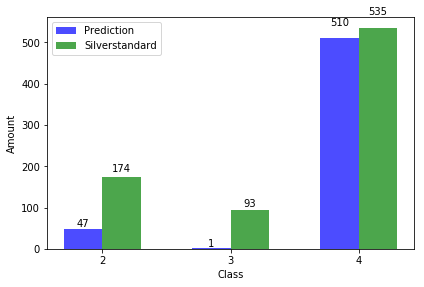

In [40]:
# Logistic regression 
print("Precision: " + str(precisionLR))
print("Recall: " + str(recallLR))
print("F1-score: " + str(f1LR))

# Class specific performance
print(classification_report(test_y, y_pred_LR))
counter = collections.Counter(y_pred_LR)
print(counter)

import numpy as np
import matplotlib.pyplot as plt

j = 0
c = 0
for i in test_y:
    if(i == 2):
        if i == y_pred_LR[j]:
            c+=1
    j+=1
print(c)

# data to plot
n_groups = 3
means_pred = (47, 1, 510)
means_silver = (174, 93, 535)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7

rects1 = plt.bar(index, means_pred, bar_width,
alpha=opacity,
color='b',
label='Prediction')

rects2 = plt.bar(index + bar_width, means_silver, bar_width,
alpha=opacity,
color='g',
label='Silverstandard')

plt.xlabel('Class')
plt.ylabel('Amount')
#plt.title('Scores by person')
plt.xticks(index + bar_width/2, ('2', '3', '4'))
plt.legend()

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height),ha='center', va='bottom')
    
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height),ha='center', va='bottom')

plt.tight_layout()
plt.show()


Precision: 0.666112319327012
Recall: 0.713216957605985
F1-score: 0.6659314500036666
             precision    recall  f1-score   support

          2       0.56      0.34      0.42       174
          3       0.39      0.10      0.16        93
          4       0.75      0.94      0.83       535

avg / total       0.67      0.71      0.67       802

Counter({4: 674, 2: 105, 3: 23})
504


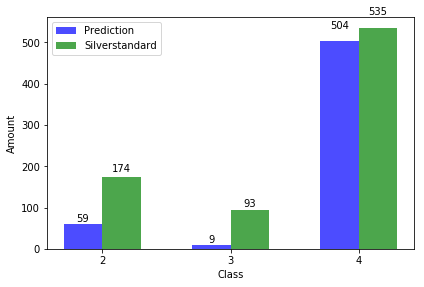

In [44]:
# Random Forest 
print("Precision: " + str(precisionRF))
print("Recall: " + str(recallRF))
print("F1-score: " + str(f1RF))

# Class specific performance
print(classification_report(test_y, y_pred_RF))
counter = collections.Counter(y_pred_RF)
print(counter)
j = 0
c = 0
for i in test_y:
    if(i == 4):
        if i == y_pred_RF[j]:
            c+=1
    j+=1
print(c)

import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
means_pred = (59, 9, 504)
means_silver = (174, 93, 535)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7

rects1 = plt.bar(index, means_pred, bar_width,
alpha=opacity,
color='b',
label='Prediction')

rects2 = plt.bar(index + bar_width, means_silver, bar_width,
alpha=opacity,
color='g',
label='Silverstandard')

plt.xlabel('Class')
plt.ylabel('Amount')
#plt.title('Scores by person')
plt.xticks(index + bar_width/2, ('2', '3', '4'))
plt.legend()

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height),ha='center', va='bottom')
    
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height),ha='center', va='bottom')

plt.tight_layout()
plt.show()

Precision: 0.6627613119142418
Recall: 0.4902743142144638
F1-score: 0.529891331716792
             precision    recall  f1-score   support

          2       0.45      0.13      0.20       406
          3       0.16      0.58      0.25       248
          4       0.82      0.58      0.68      1351

avg / total       0.66      0.49      0.53      2005

53
Counter({4: 956, 3: 930, 2: 119})


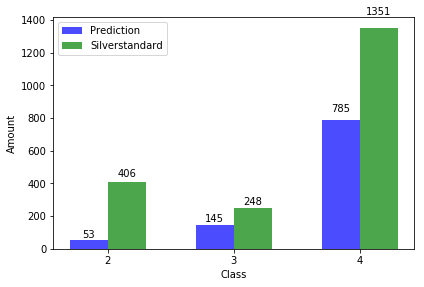

In [17]:
#rule based approch HPMP
df = pd.read_csv('eval.csv',sep=';')
df = df[df['silverMapping'] != 0.0]
precisionRB, recallRB, f1RB,_ = precision_recall_fscore_support(df['silverMapping'].values, df['ourScore'].values, average='weighted')
print("Precision: " + str(precisionRB))
print("Recall: " + str(recallRB))
print("F1-score: " + str(f1RB))

# Class specific performance
print(classification_report(df['silverMapping'].values, df['ourScore'].values))
vals = df['ourScore'].values
j=0
c=0
for i in df['silverMapping'].values:
    if(i == 2):
        if i == vals[j]:
            c+=1
    j+=1
print(c)
counter = collections.Counter(df['ourScore'].values)
print(counter)

import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
means_pred = (53, 145, 785)
means_silver = (406, 248, 1351)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7

rects1 = plt.bar(index, means_pred, bar_width,
alpha=opacity,
color='b',
label='Prediction')

rects2 = plt.bar(index + bar_width, means_silver, bar_width,
alpha=opacity,
color='g',
label='Silverstandard')

plt.xlabel('Class')
plt.ylabel('Amount')
#plt.title('Scores by person')
plt.xticks(index + bar_width/2, ('2', '3', '4'))
plt.legend()

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height),ha='center', va='bottom')
    
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height),ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [19]:
#rule based approach ORDO-DOID
df = pd.read_csv('ORDODOIDres.csv',sep=';')
df = df[df['silverMapping'] != 0.0]
precisionRB, recallRB, f1RB,_ = precision_recall_fscore_support(df['silverMapping'].values, df['ourScore'].values, average='weighted')
print("Precision: " + str(precisionRB))
print("Recall: " + str(recallRB))
print("F1-score: " + str(f1RB))

# Class specific performance
print(classification_report(df['silverMapping'].values, df['ourScore'].values))

Precision: 0.9804657686259115
Recall: 0.9296536796536796
F1-score: 0.9531769077223622
             precision    recall  f1-score   support

          2       0.00      0.00      0.00         4
          3       0.05      0.43      0.09         7
          4       0.99      0.94      0.96       913

avg / total       0.98      0.93      0.95       924

